In [2]:
import os 
import datetime
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import plotly.express as px

In [3]:
mpl.rcParams["figure.figsize"] = (15,6)
mpl.rcParams["axes.grid"] = False

## import weather dataset

In [4]:
zipPath = tf.keras.utils.get_file(
    origin = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip" ,
    fname=  "jena_climate_2009_2016.csv.zip" ,
    extract = True)

In [5]:
csvPath, ignore = os.path.splitext(zipPath)
dataFrame = pd.read_csv(csvPath)
dataFrame.to_csv("jena_climate_2009_2016.csv")
# dataFrame.head()
# dataFrame.to_excel("jena_climate_2009_2016.xlsx")


In [6]:
pd.set_option("display.max_row",None)
dataFrame.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [7]:
dataFrame = dataFrame[11::12]
dataFrame.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
35,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
47,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
59,01.01.2009 10:00:00,1000.27,-7.04,266.10,-8.17,91.6,3.60,3.30,0.30,2.05,3.29,1307.76,1.45,3.00,292.6
71,01.01.2009 12:00:00,1000.30,-6.87,266.27,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.4
83,01.01.2009 14:00:00,999.81,-5.94,267.24,-7.43,89.1,3.92,3.49,0.43,2.17,3.49,1301.67,1.25,2.00,144.0
95,01.01.2009 16:00:00,999.94,-5.40,267.76,-6.86,89.4,4.08,3.65,0.43,2.27,3.65,1299.17,1.40,2.13,145.5
107,01.01.2009 18:00:00,1000.16,-5.25,267.90,-6.75,89.1,4.13,3.68,0.45,2.29,3.68,1298.68,0.55,1.00,183.7
119,01.01.2009 20:00:00,1000.22,-4.90,268.24,-6.38,89.3,4.24,3.79,0.45,2.36,3.78,1297.05,0.68,1.13,195.2


# Removing the Date Time col and storing it in date_time

In [1]:
date_time = dataFrame.pop("Date Time")
parsed_value = pd.to_datetime(date_time, format = "%d.%m.%Y %H:%M:%S")

NameError: name 'dataFrame' is not defined

In [9]:
dataFrame.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

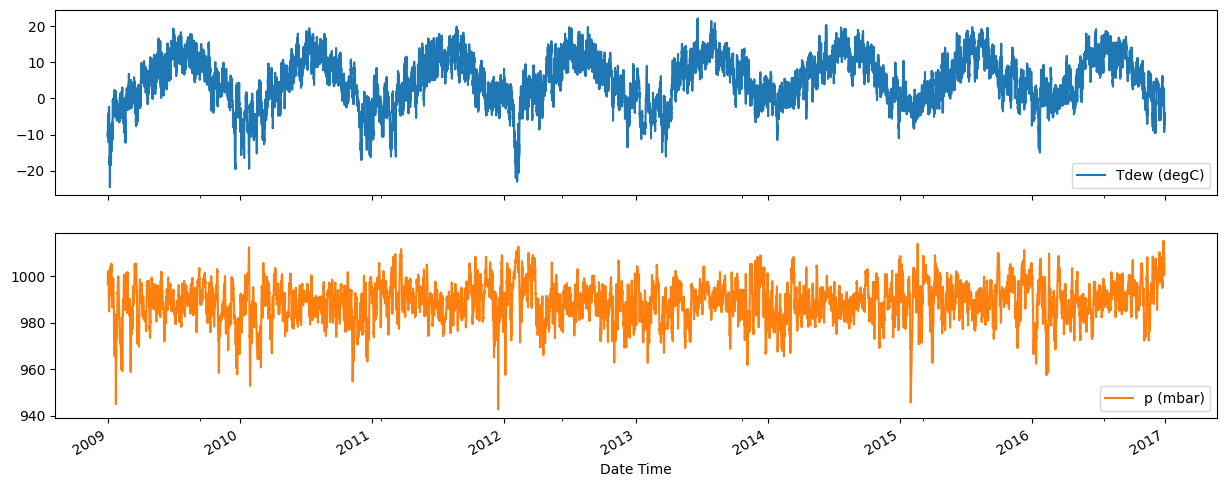

In [10]:
plotCols = ['Tdew (degC)','p (mbar)']
plotFeat = dataFrame[plotCols]
plotFeat.index = parsed_value
i = plotFeat.plot(subplots = True)


In [11]:

fig = px.line(dataFrame, x = parsed_value, y = "Tdew (degC)")
fig.show()
# fig = px.line(dataFrame, x = parsed_value, y = "p (mbar)")
# fig.update_traces(line_color = "green")
# fig.show()